In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [33]:
mode = 'low'

In [34]:
files = os.listdir(f'./{mode}_vol1/iter10')
files2 = os.listdir(f'./{mode}_vol2/iter10')
data = pd.read_csv(f'./{mode}_vol1/iter10/'+files[0], index_col=0)
for i in files[1:]:
    data1 = pd.read_csv(f'./{mode}_vol1/iter10/'+i, index_col=0)
    data = pd.concat([data, data1], ignore_index=True)
for i in files2:
    data1 = pd.read_csv(f'./{mode}_vol2/iter10/'+i, index_col=0)
    data = pd.concat([data, data1], ignore_index=True)
    
data.head(100)
data['last_traded_price'].std()

0.0007723024378341754

In [27]:
def clean(df):
    df = df.copy()
    for idx in df.index[1:]:
        if 'market' in df.loc[idx-1, "order_type"].lower() and df.loc[idx-1, "executed"] != df.loc[idx-1, "remained_shares"]:
            df.loc[idx-1, 'executed'] = df.loc[idx-1, "remained_shares"]
            df.loc[idx, 'executed'] -= df.loc[idx-1, "remained_shares"]
        df.loc[idx-1, "executed"] = max(0, df.loc[idx-1, "executed"])
        if 'market' in df.loc[idx-1, "order_type"].lower():
            df.loc[idx-1, 'reward'] = -0.003 * df.loc[idx-1, "executed"] * 100
        else:
            df.loc[idx-1, 'reward'] = (df.loc[idx-1, 'premium']+0.002) * df.loc[idx-1, "executed"] * 100

    if 'market' in df.loc[idx, "order_type"].lower():
        df.loc[idx, 'reward'] = -0.003 * df.loc[idx, "executed"] * 100
    else:
        df.loc[idx, 'reward'] = (df.loc[idx, 'premium']+0.002) * df.loc[idx, "executed"] * 100
    return df
clean(data)

,BA_spead,last_traded_price,Smart_price,Liquidity_imb,market_cost,remained_shares,remained_time,reward,order_type,is_buy,premium,obj_price,base_price,executed,done
0,0.01,0.175150,0.175143,0.015,0.003093,6.0,5.0,0.0,Type.LIMIT_SELL,False,0.03,175.170000,175.140000,0.0,False
1,0.01,0.175150,0.175154,0.016,0.003093,6.0,4.0,0.0,Type.LIMIT_SELL,False,0.04,175.190000,175.150000,0.0,False
2,0.01,0.175156,0.175156,0.008,0.003093,6.0,3.0,0.0,Type.LIMIT_SELL,False,0.04,175.201667,175.161667,0.0,False
3,0.02,0.175190,0.175176,0.032,0.003033,6.0,2.0,7.2,Type.LIMIT_SELL,False,0.01,175.150000,175.140000,6.0,True
4,0.02,0.175140,0.175151,-0.066,0.003273,6.0,5.0,0.0,Type.LIMIT_BUY,True,0.03,175.130000,175.160000,0.0,False
5,0.01,0.175140,0.175155,-0.050,0.003263,6.0,4.0,0.0,Type.LIMIT_BUY,True,0.05,175.118333,175.168333,0.0,False
6,0.01,0.175156,0.175152,-0.055,0.003213,6.0,3.0,0.0,Type.LIMIT_BUY,True,0.01,175.160000,175.170000,0.0,False
7,0.01,0.175160,0.175161,-0.013,0.003213,6.0,2.0,0.0,Type.LIMIT_BUY,True,0.02,175.150000,175.170000,0.0,False
8,0.02,0.175170,0.175175,-0.017,0.003273,6.0,1.0,7.2,Type.LIMIT_BUY,True,0.01,175.180000,175.190000,6.0,True
9,0.01,0.175160,0.175160,-0.023,0.000515,1.0,5.0,0.0,Type.LIMIT_SELL,False,0.08,175.230000,175.150000,0.0,False


In [11]:
def AdjCost(x):
    if "market" in x.lower():
        ret = -0.3
    else:
        ret = 0
    return ret

In [4]:
data['Adj_reward'] = data.order_type.apply(AdjCost)*data.remained_shares+data.reward
data

,BA_spead,last_traded_price,Smart_price,Liquidity_imb,market_cost,remained_shares,remained_time,reward,order_type,is_buy,premium,obj_price,base_price,executed,done,Adj_reward
0,0.02,0.175200,0.175207,-0.045,0.002183,4.0,5.0,0.0,Type.LIMIT_BUY,True,0.09,175.130,175.220,0,False,0.0
1,0.01,0.175220,0.175216,-0.007,0.002143,4.0,4.0,0.0,Type.LIMIT_BUY,True,0.06,175.150,175.210,0,False,0.0
2,0.01,0.175210,0.175208,0.005,0.002143,4.0,3.0,0.0,Type.LIMIT_BUY,True,0.09,175.120,175.210,0,False,0.0
3,0.01,0.175210,0.175207,-0.001,0.002143,4.0,2.0,0.0,Type.LIMIT_BUY,True,0.02,175.200,175.220,0,False,0.0
4,0.02,0.175210,0.175215,-0.009,0.002183,4.0,1.0,4.8,Type.LIMIT_BUY,True,0.01,175.210,175.220,4,True,4.8
5,0.01,0.175210,0.175213,0.029,0.002568,5.0,5.0,0.0,Type.LIMIT_SELL,False,0.08,175.280,175.200,0,False,0.0
6,0.01,0.175210,0.175212,0.024,0.002548,5.0,4.0,0.0,Type.LIMIT_SELL,False,0.07,175.270,175.200,0,False,0.0
7,0.02,0.175210,0.175212,0.012,0.002528,5.0,3.0,0.0,Type.LIMIT_SELL,False,0.08,175.280,175.200,0,False,0.0
8,0.02,0.175210,0.175213,0.008,0.002528,5.0,2.0,6.0,Type.LIMIT_SELL,False,0.01,175.220,175.210,5,True,6.0
9,0.01,0.175210,0.175213,-0.018,0.002678,5.0,5.0,0.0,Type.LIMIT_BUY,True,0.08,175.138,175.218,0,False,0.0


In [6]:
vol1 = data.loc[0:1000, 'last_traded_price'].std()
vol2 = data.loc[1000:, 'last_traded_price'].std()
print(vol1, vol2)

0.00010583520730312415 0.00036824577176525935


In [68]:
agg_cost = []
obj_shares = []
tot_rwd = 0
obj_share = data.loc[0,'remained_shares']
for i in data.index:
    tot_rwd += data.loc[i, "Adj_reward"]
    if data.loc[i, "done"] == True:
        agg_cost.append(tot_rwd)
        obj_shares.append(obj_share)
        try:
            obj_share = data.loc[i+1, 'remained_shares']
        except IndexError:
            break
        tot_rwd = 0      

In [69]:
data_new = pd.DataFrame({"obj_shares":obj_shares, "agg_cost":agg_cost})
data_new['market_cost'] = data_new.obj_shares*(-0.3)
data_new

,obj_shares,agg_cost,market_cost
0,2.0,-0.600000,-0.6
1,3.0,10.100000,-0.9
2,3.0,8.600000,-0.9
3,4.0,19.800000,-1.2
4,4.0,17.800001,-1.2
5,5.0,19.500000,-1.5
6,5.0,-1.500000,-1.5
7,6.0,50.700001,-1.8
8,6.0,13.200000,-1.8
9,1.0,17.800001,-0.3


In [78]:
exp_data_all = data_new.groupby(np.arange(len(data_new))//5).mean()
exp_data_all['cost_per_share'] = exp_data_all.agg_cost/exp_data_all.obj_shares
exp_data_all

,obj_shares,agg_cost,market_cost,cost_per_share
0,3.200000,11.140000,-0.96,3.481250
1,4.600000,19.940000,-1.38,4.334783
2,5.200000,15.100000,-1.56,2.903846
3,3.200000,14.160000,-0.96,4.425000
4,1.800000,15.360000,-0.54,8.533333
5,4.600000,18.400000,-1.38,4.000000
6,2.400000,13.180000,-0.72,5.491667
7,3.800000,9.560000,-1.14,2.515790
8,3.800000,10.220000,-1.14,2.689474
9,4.600000,1.920000,-1.38,0.417391


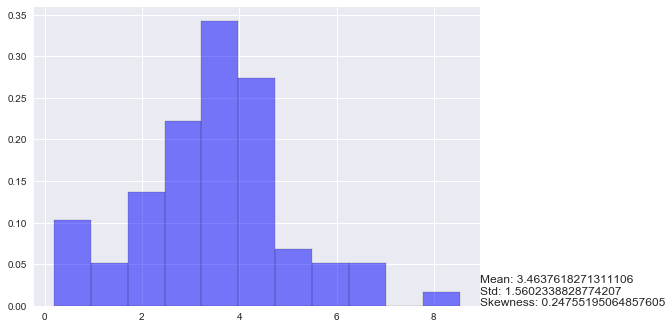

In [101]:
mean = exp_data_all.cost_per_share.mean()
std = exp_data_all.cost_per_share.std()
skew = exp_data_all.cost_per_share.skew()
num_bins = 11
n, bins, patches = plt.hist(exp_data_all.cost_per_share, num_bins, 
                            facecolor='blue', alpha=0.5, density=True,
                            edgecolor='k')
plt.text(plt.xlim()[1],plt.ylim()[0],f'Mean: {mean}\nStd: {std}\nSkewness: {skew}')
plt.show()

In [92]:
m

In [93]:
skew

0.24755195064857605